# Import Modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

sys.path.insert(
    0,
    os.path.join(
        os.environ["PROJ_irox"],
        "scripts",
        ),
    )

sys.path.insert(
    0,
    os.path.join(
        os.environ["PROJ_irox"],
        "workflow/an_analysis_dir",
        ),
    )

# sys.path.insert(
#     0,
#     os.path.join(
#         os.environ["PROJ_irox"],
#         "workflow/data",
#         ),
#     )

from Pourbaix_simple_generic import plot_Pourbaix
from an_data_processing import load_df

from ase_modules.ase_methods import create_species_element_dict

Divisor is Energy class instance!!!
Divisor is Energy class instance!!!


In [3]:
from data import h2_ref as h2
from data import h2o_ref as h2o

from data import zpe_h2o
from data import cv_h2o
from data import ts_h2o

from data import zpe_h2
from data import cv_h2
from data import ts_h2

from data import zpe_ooh
from data import cv_ooh
from data import ts_ooh

from data import zpe_o
from data import cv_o
from data import ts_o

from data import zpe_oh
from data import cv_oh
from data import ts_oh

# Script Inputs

In [4]:
close_plt = False

save_dir = os.path.join(
    os.environ["PROJ_irox"],
    "workflow/pl_master_plots/pl_pourbaix"
    )

Umin=0.0
Umax=2.2

In [5]:
Pourbaix_arg_dict = {
#     "surfs": surfs,
    "h2": h2,
    "zpe_h2": zpe_h2,
    "ts_h2": ts_h2,
    "cv_h2": cv_h2,
    "h2o": h2o,
    "zpe_h2o": zpe_h2o,
    "ts_h2o": ts_h2o,
    "cv_h2o": cv_h2o,
    "zpe_o": zpe_o,
    "ts_o": ts_o,
    "cv_o": cv_o,
    "zpe_oh": zpe_oh,
    "ts_oh": ts_oh,
    "cv_oh": cv_oh,
    "zpe_ooh": zpe_ooh,
    "ts_ooh": ts_ooh,
    "cv_ooh": cv_ooh,
    "Umin": Umin,
    "Umax": Umax,
    "print_out": False,
    "save_dir": save_dir,
#     "file_name": "_".join(list(key_i)) + ".pdf",
    "close_plt": close_plt,
    }

In [6]:
Pourbaix_arg_dict = {
#     "surfs": surfs,
    "h2": h2,
    "zpe_h2": 0.,
    "ts_h2": 0.,
    "cv_h2": 0.,
    "h2o": h2o,
    "zpe_h2o": 0.,
    "ts_h2o": 0.,
    "cv_h2o": 0.,
    "zpe_o": 0.,
    "ts_o": 0.,
    "cv_o": 0.,
    "zpe_oh": 0.,
    "ts_oh": 0.,
    "cv_oh":0.,
    "zpe_ooh": 0.,
    "ts_ooh": 0.,
    "cv_ooh": 0.,
    "Umin": Umin,
    "Umax": Umax,
    "print_out": False,
    "save_dir": save_dir,
#     "file_name": "_".join(list(key_i)) + ".pdf",
    "close_plt": close_plt,
    }

# Read/Process DataFrame

In [7]:
dataframe_dir = os.path.join(
    os.environ["PROJ_irox"],
    "workflow/data",
    )

df_pourbaix, df_ads, df_surf = load_df(
    from_file=False,

    root_dir=dataframe_dir,
    data_dir=dataframe_dir,

#     root_dir="../../data",
#     data_dir="../../data",

    file_name="df_master.pickle",
    process_df=True,
    )

# df_pourbaix, df_ads, df_surf = load_df(
#     from_file=False,
#     root_dir="../data",
#     data_dir="../data",
#     file_name="df_master.pickle",
#     process_df=True,
#     )

df_m = df_pourbaix

# Elimate structures that aren't converged w.r.t. forces
df_m = df_m[df_m["max_force"] < 0.05]

df_m["name_i"] = df_m["name_i"].str.replace("_", " ")
df_m["name_i"] = df_m["name_i"].str.replace("|", ",")

grouped = df_m.groupby(["facet", "bulk_system"])
group_dict = {}
for i_ind, (name, group) in enumerate(grouped):
    df_i = group
    group_dict[name] = group

In [8]:
# df_m

# Pourbaix Diagrams

## IrO3 ------------------------------

### IrO3 | 100

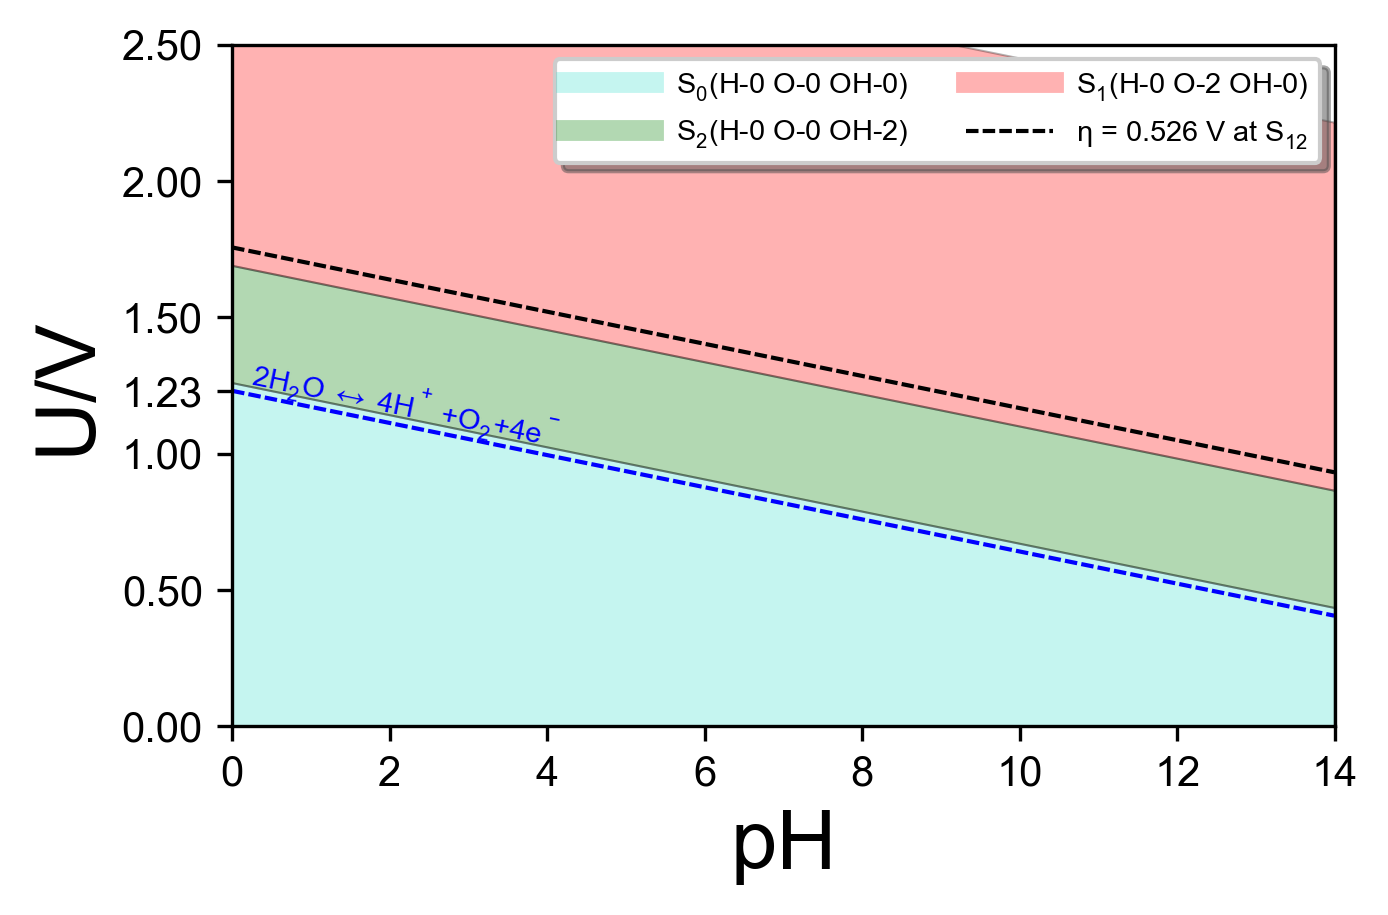

In [9]:
key_i = ("100", "IrO3")
df_i = group_dict[key_i]

surfs = [
    # Clean ******************************************************
    [df_i[df_i["coverage_type"] == "bare"].iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[0].elec_energy,
        0, 2, 0],

    # *OH ********************************************************
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[0].elec_energy,
        0, 0, 2],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

### IrO3 | 110

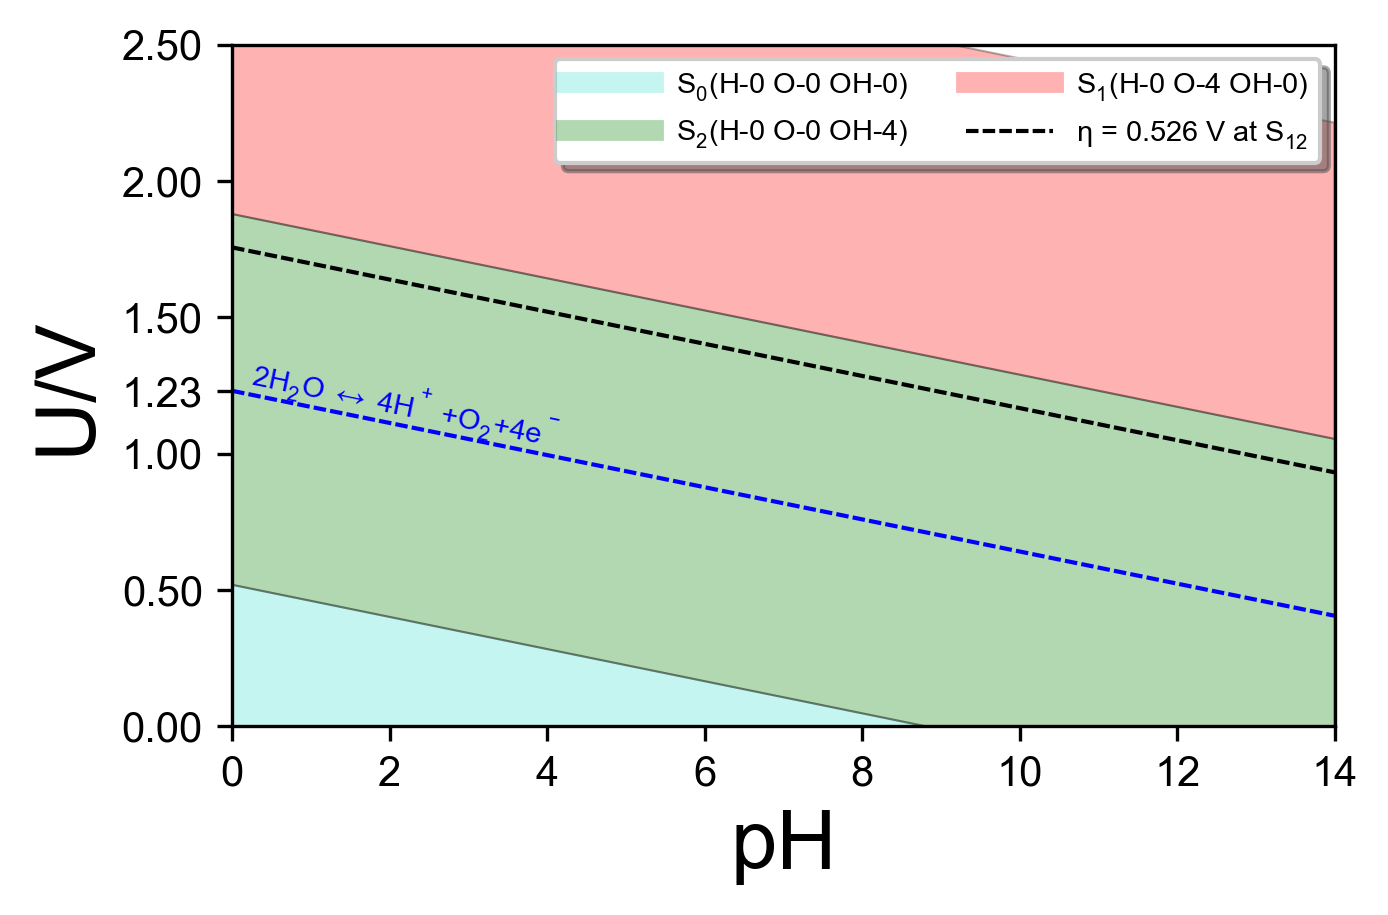

In [10]:
key_i = ("110", "IrO3")
df_i = group_dict[key_i]

surfs = [
    # Clean ******************************************************
    [df_i[df_i["coverage_type"] == "bare"].iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[0].elec_energy,
        0, 4, 0],

    # *OH ********************************************************
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[0].elec_energy,
        0, 0, 4],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

### IrO3 | 111

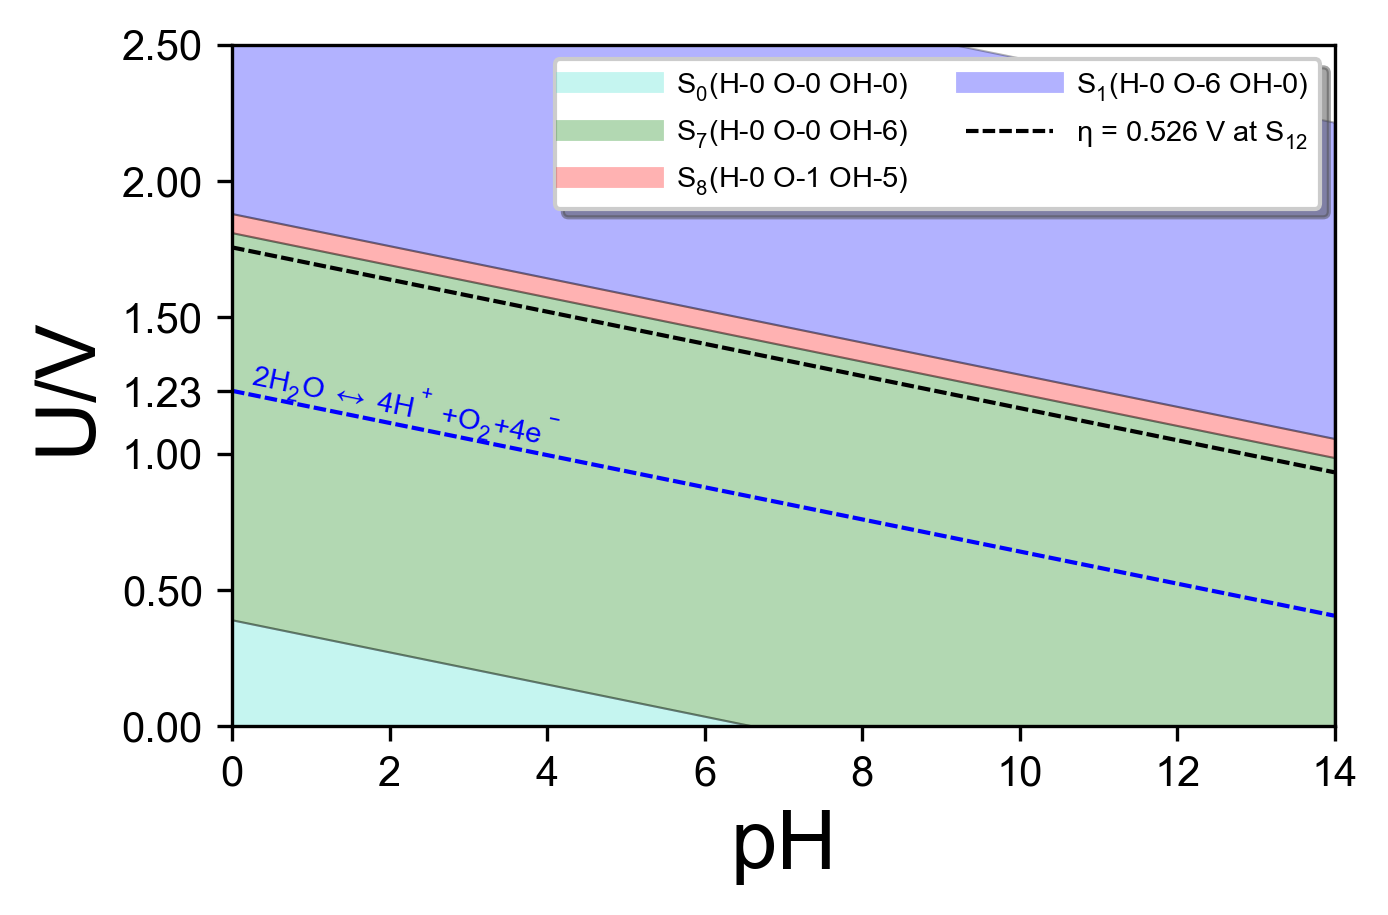

In [11]:
key_i = ("111", "IrO3")
df_i = group_dict[key_i]

surfs = [
    # Clean ******************************************************
    [df_i[df_i["coverage_type"] == "bare"].iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-1].elec_energy,
        0, 6, 0],
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-2].elec_energy,
        0, 5, 0],
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-3].elec_energy,
        0, 4, 0],
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-4].elec_energy,
        0, 3, 0],
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-5].elec_energy,
        0, 2, 0],
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-6].elec_energy,
        0, 1, 0],

    # *OH ********************************************************
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-1].elec_energy,
        0, 0, 6],
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-2].elec_energy,
        0, 1, 5],
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-3].elec_energy,
        0, 2, 4],
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-4].elec_energy,
        0, 3, 3],
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-5].elec_energy,
        0, 4, 2],
#     [df_i[df_i["coverage_type"] == "h_covered"].iloc[-6].elec_energy,
#         0, 5, 1],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

### IrO3 | 211

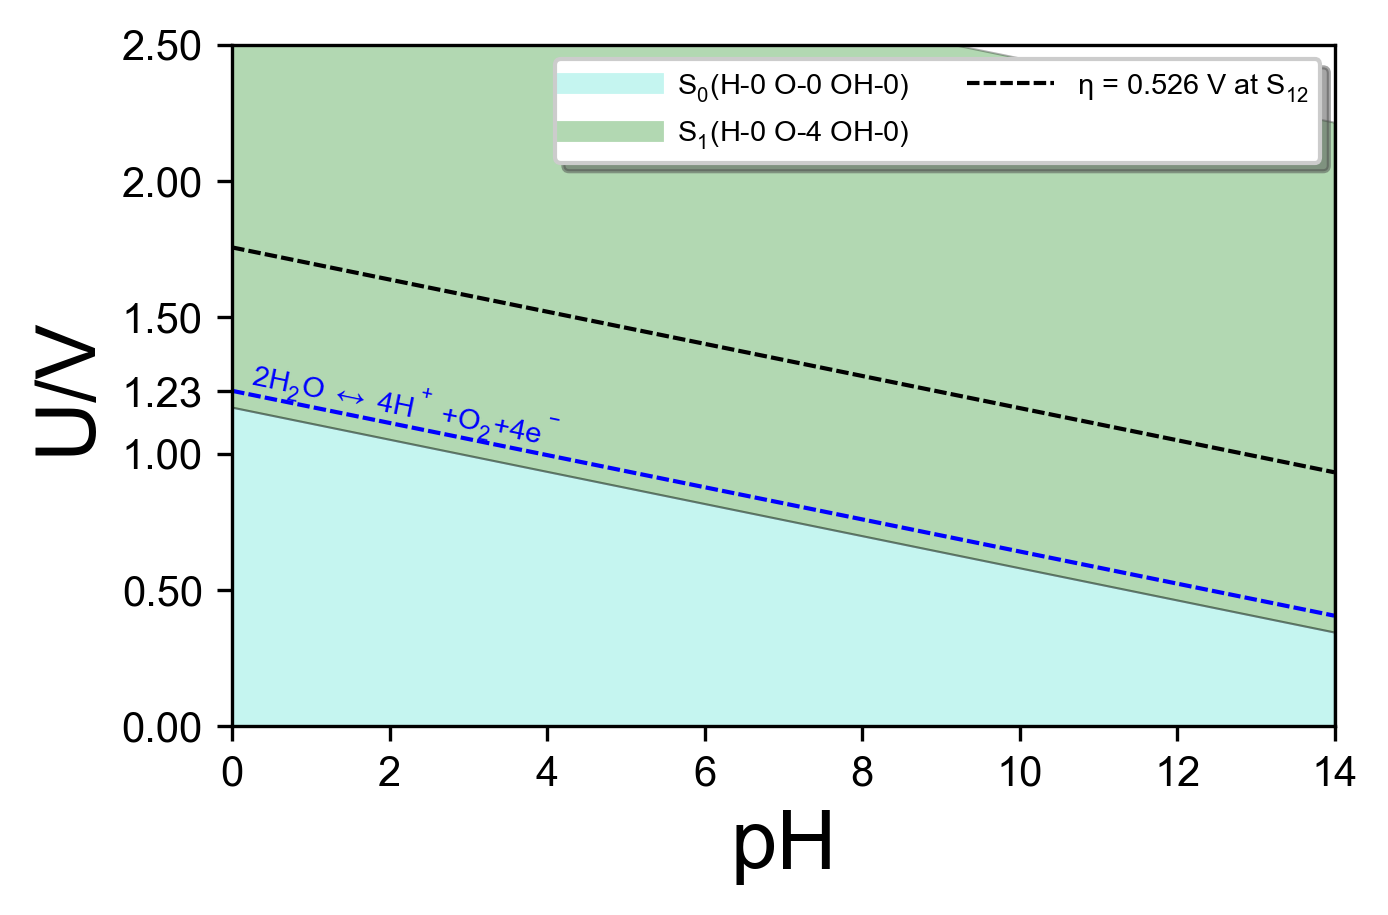

In [12]:
key_i = ("211", "IrO3")
df_i = group_dict[key_i]

surfs = [
    # Clean ******************************************************
    [df_i[df_i["coverage_type"] == "bare"].iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[0].elec_energy,
        0, 4, 0],

#     # *OH ********************************************************
#     [df_i[df_i["coverage_type"] == "h_covered"].iloc[1].elec_energy,
#         0, 0, 4],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

***
***

## IrO2 ------------------------------

### IrO2 | 100

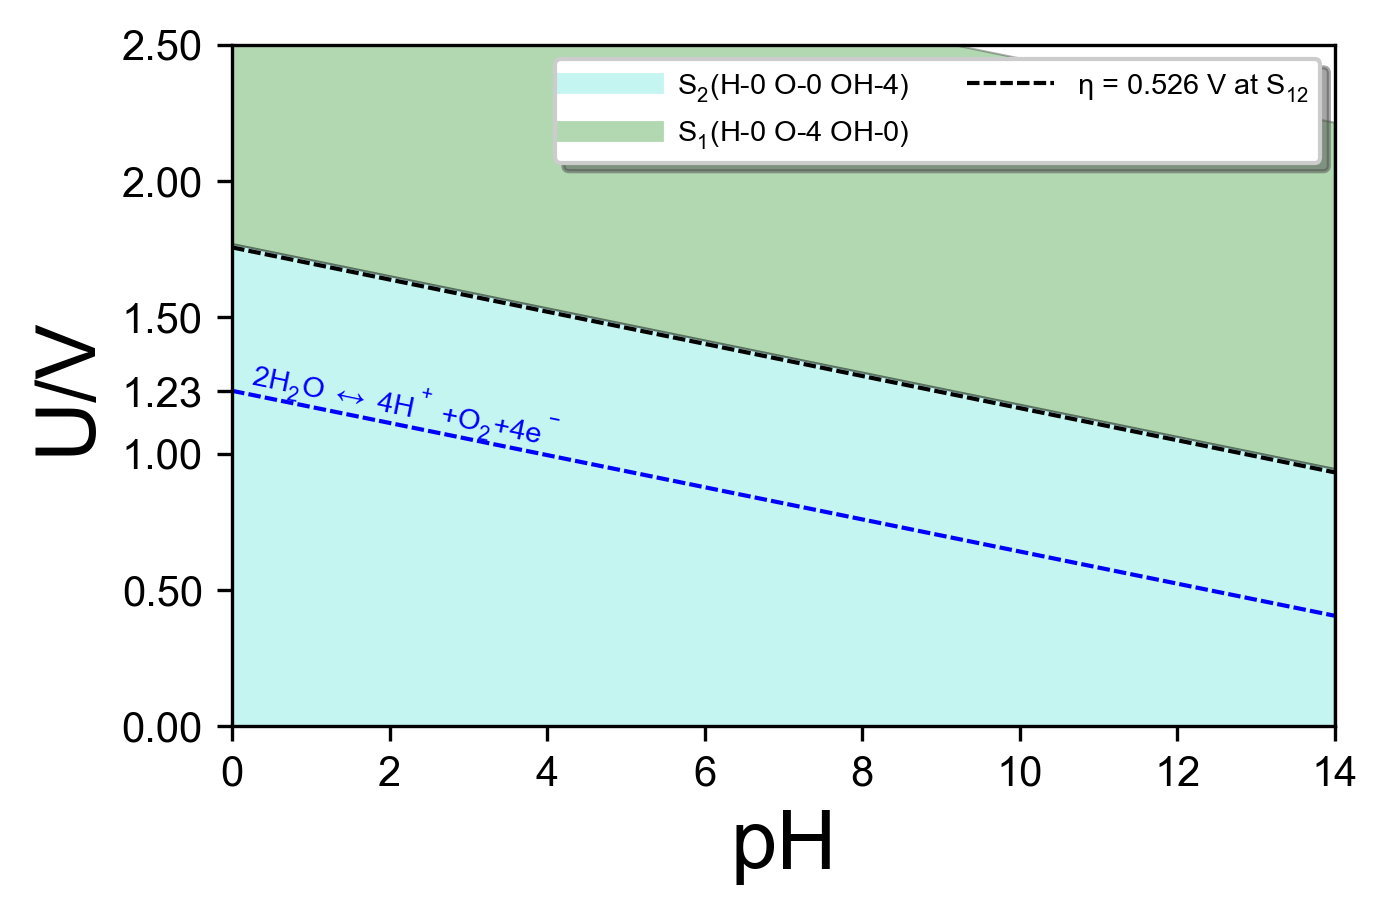

In [13]:
key_i = ("100", "IrO2")
df_i = group_dict[key_i]

surfs = [ 
    # Clean ******************************************************
    [df_i[df_i["coverage_type"] == "bare"].iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-1].elec_energy,
        0, 4, 0],
#     [df_i[df_i["coverage_type"] == "o_covered"].iloc[-2].elec_energy,
#         0, 1, 0],

    # *OH ********************************************************
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-1].elec_energy,
        0, 0, 4],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

In [14]:
# view(df_i[df_i["coverage_type"] == "h_covered"].iloc[-1].atoms_object)

In [15]:
# from ase.visualize import view
# view(df_i.loc[20].atoms_object)

### IrO2 | 110

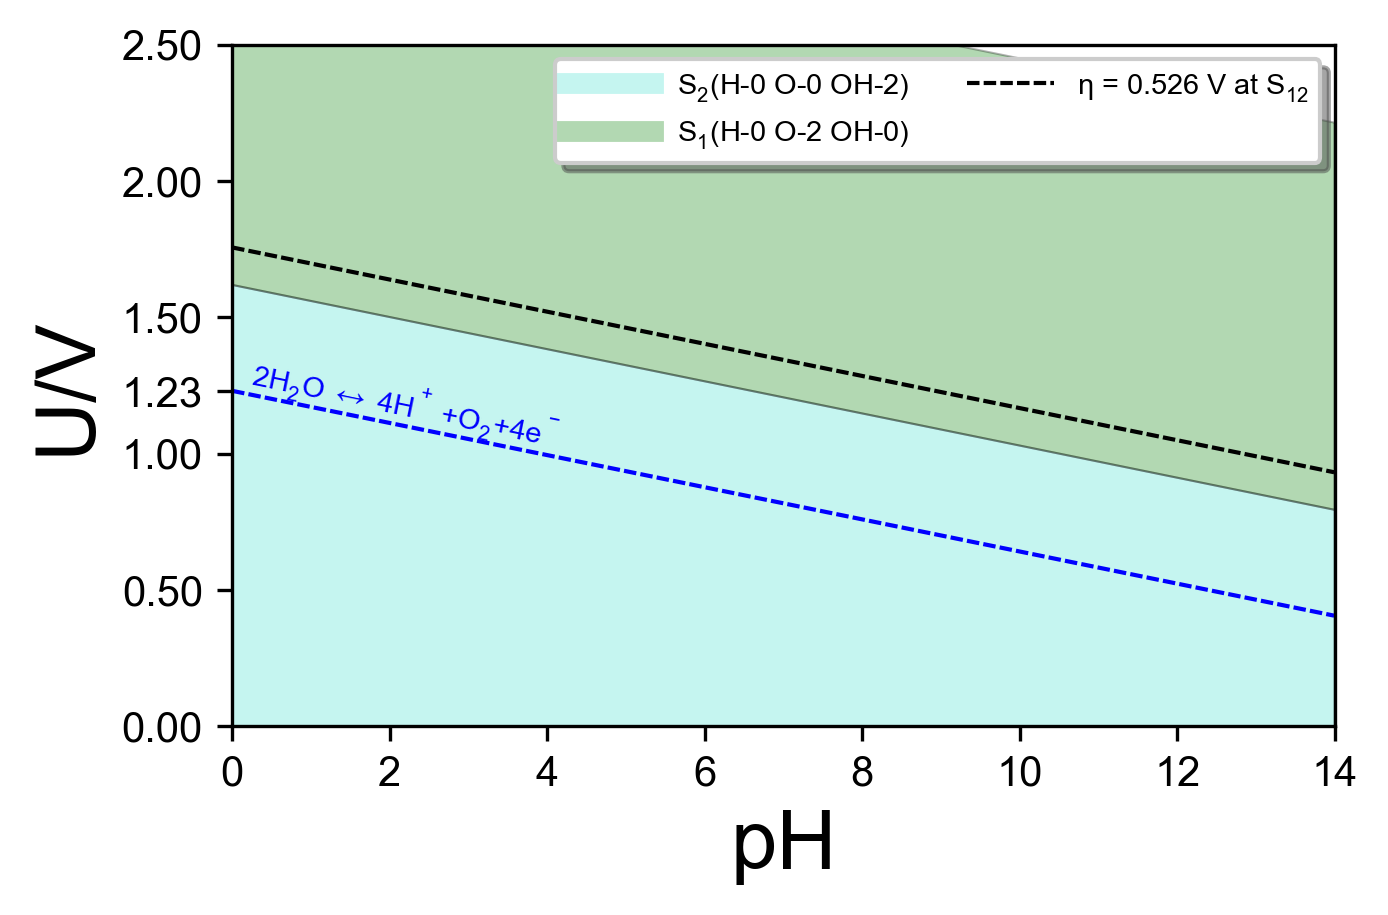

In [16]:
key_i = ("110", "IrO2")
df_i = group_dict[key_i]

surfs = [ 
    # Clean ******************************************************
    [df_i[df_i["coverage_type"] == "bare"].iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [df_i[df_i["coverage_type"] == "o_covered"].iloc[-1].elec_energy,
        0, 2, 0],

    # *OH ********************************************************
    [df_i[df_i["coverage_type"] == "h_covered"].iloc[-1].elec_energy,
        0, 0, 2],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

## IrO3_rutile-like ------------------

### IrO3_rutile-like | 001

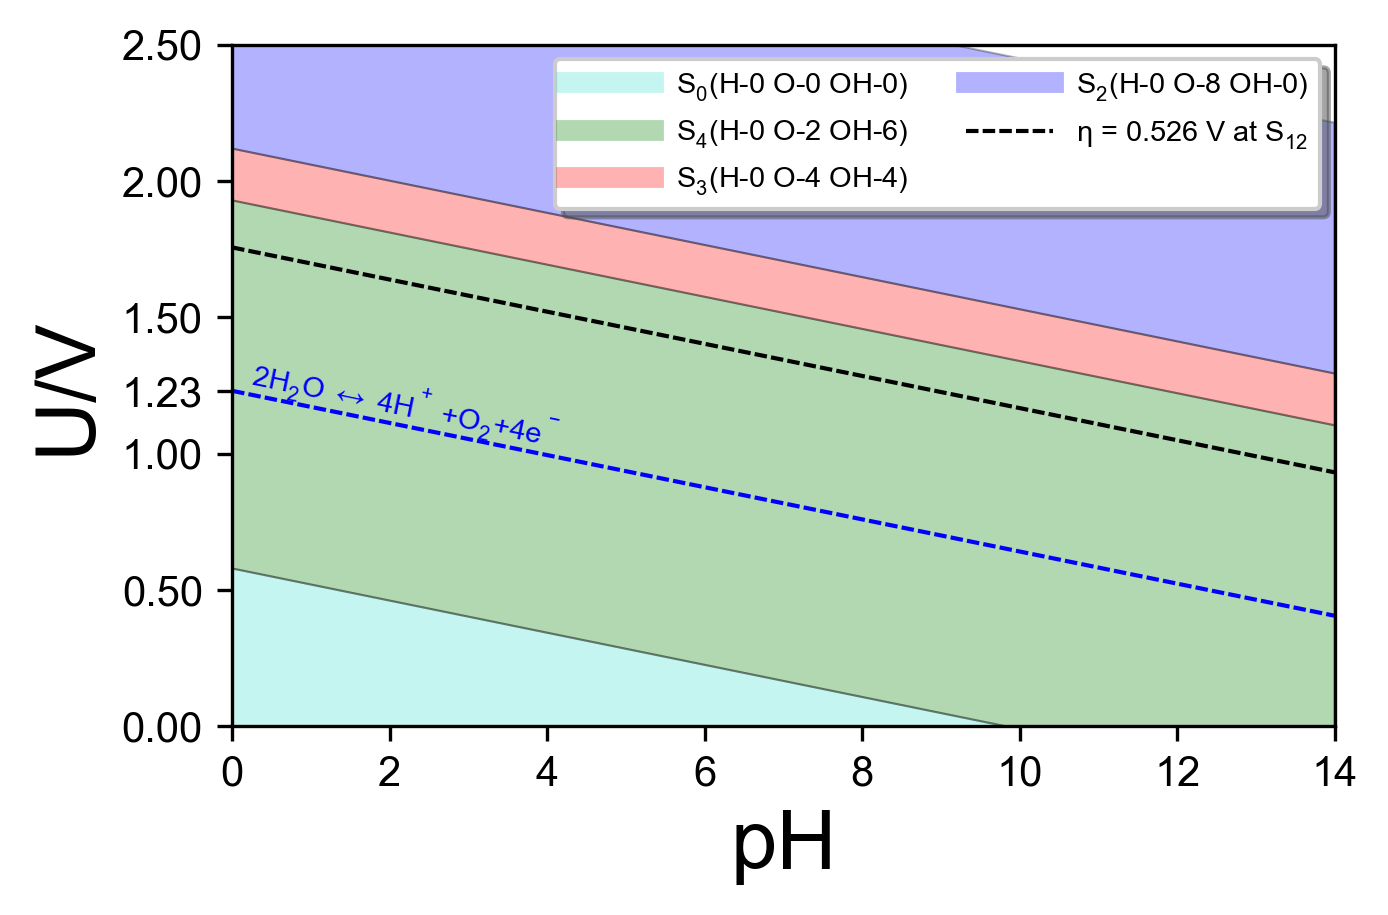

In [17]:
key_i = ("001", "IrO3_rutile-like")
df_i = group_dict[key_i]

bare_i = df_i.loc[
    (df_i["coverage_type"] == "o_covered") & \
    (df_i["coverage"] == "0.0")
    ]

o_covered_i = df_i.loc[
    (df_i["coverage_type"] == "o_covered")
    ]

h_covered_i = df_i.loc[
    (df_i["coverage_type"] == "h_covered")
    ]

surfs = [ 
    # Clean ******************************************************
    [bare_i.iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************

#     [o_covered_i[o_covered_i["coverage"] == "0.125"].iloc[0].elec_energy,
#         0, 1, 0],
#     [o_covered_i[o_covered_i["coverage"] == "0.25"].iloc[0].elec_energy,
#         0, 2, 0],
#     [o_covered_i[o_covered_i["coverage"] == "0.375"].iloc[0].elec_energy,
#         0, 3, 0],

    [o_covered_i[o_covered_i["coverage"] == "0.5"].iloc[0].elec_energy,
        0, 4, 0],

#     [o_covered_i[o_covered_i["coverage"] == "0.625"].iloc[0].elec_energy,
#         0, 5, 0],
#     [o_covered_i[o_covered_i["coverage"] == "0.75"].iloc[0].elec_energy,
#         0, 6, 0],
#     [o_covered_i[o_covered_i["coverage"] == "0.875"].iloc[0].elec_energy,
#         0, 7, 0],
    [o_covered_i[o_covered_i["coverage"] == "1.0"].iloc[0].elec_energy,
        0, 8, 0],

#     # *OH ********************************************************
#     [h_covered_i[h_covered_i["coverage"] == "0.125"].iloc[0].elec_energy,
#         0, 7, 1],
#     [h_covered_i[h_covered_i["coverage"] == "0.25"].iloc[0].elec_energy,
#         0, 6, 2],
#     [h_covered_i[h_covered_i["coverage"] == "0.375"].iloc[0].elec_energy,
#         0, 5, 3],
     [h_covered_i[h_covered_i["coverage"] == "0.5"].iloc[0].elec_energy,
        0, 4, 4],
#     [h_covered_i[h_covered_i["coverage"] == "0.625"].iloc[0].elec_energy,
#         0, 3, 5],
    [h_covered_i[h_covered_i["coverage"] == "0.75"].iloc[0].elec_energy,
        0, 2, 6],

#     [h_covered_i[h_covered_i["coverage"] == "0.875"].iloc[0].elec_energy,
#         0, 1, 7],
#     [h_covered_i[h_covered_i["coverage"] == "1.0"].iloc[0].elec_energy,
#         0, 0, 8],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

### IrO3_rutile-like | 100

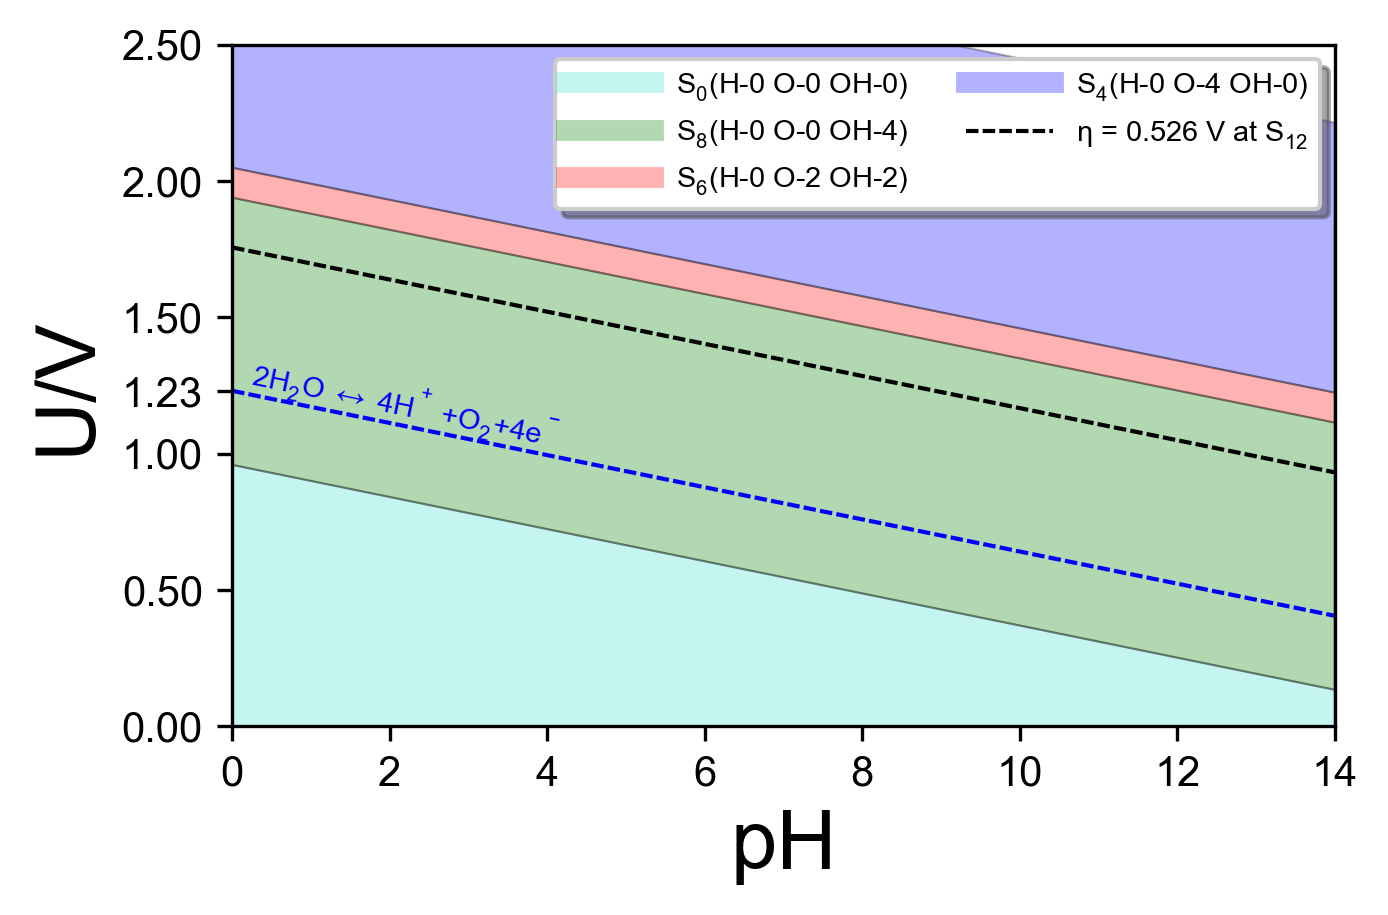

In [18]:
key_i = ("100", "IrO3_rutile-like")
df_i = group_dict[key_i]

bare_i = df_i.loc[
    (df_i["coverage_type"] == "o_covered") & \
    (df_i["coverage"] == "0.0")
    ]

o_covered_i = df_i.loc[
    (df_i["coverage_type"] == "o_covered")
    ]

h_covered_i = df_i.loc[
    (df_i["coverage_type"] == "h_covered")
    ]

surfs = [ 
    # Clean ******************************************************
    [bare_i.iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [o_covered_i[o_covered_i["coverage"] == "0.25"].iloc[0].elec_energy,
        0, 1, 0],
    [o_covered_i[o_covered_i["coverage"] == "0.5"].iloc[0].elec_energy,
        0, 2, 0],
    [o_covered_i[o_covered_i["coverage"] == "0.75"].iloc[0].elec_energy,
        0, 3, 0],
    [o_covered_i[o_covered_i["coverage"] == "1.0"].iloc[0].elec_energy,
        0, 4, 0],
    
    # *H *********************************************************
    [h_covered_i[h_covered_i["coverage"] == "0.25"].iloc[0].elec_energy,
        0, 3, 1],
    [h_covered_i[h_covered_i["coverage"] == "0.5"].iloc[0].elec_energy,
        0, 2, 2],
    [h_covered_i[h_covered_i["coverage"] == "0.75"].iloc[0].elec_energy,
        0, 1, 3],
    [h_covered_i[h_covered_i["coverage"] == "1.0"].iloc[0].elec_energy,
        0, 0, 4],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)

### IrO3_rutile-like | 110

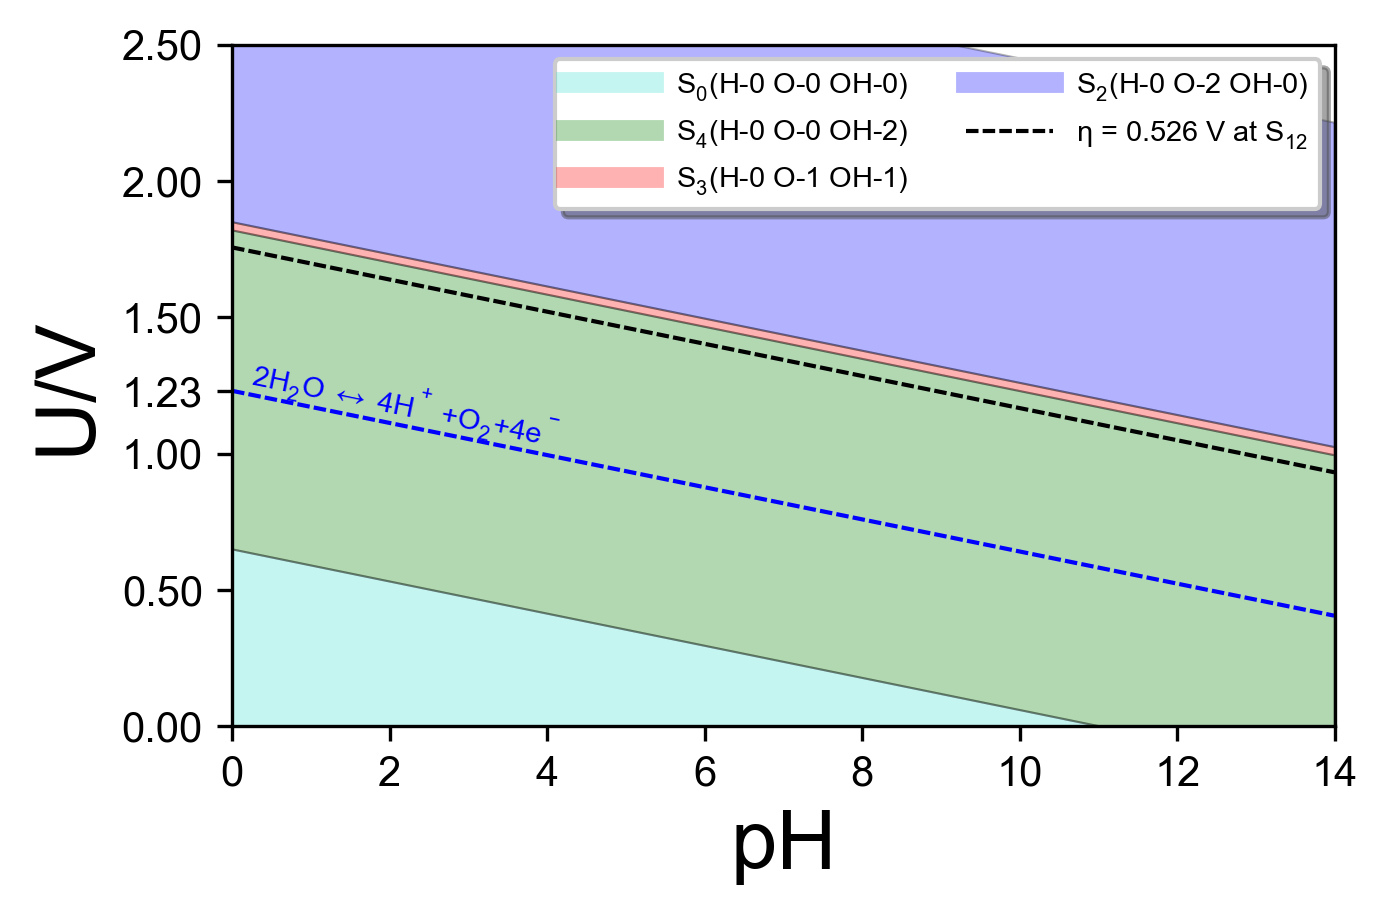

In [19]:
key_i = ("110", "IrO3_rutile-like")
df_i = group_dict[key_i]

bare_i = df_i.loc[
    (df_i["coverage_type"] == "o_covered") & \
    (df_i["coverage"] == "0.0")
    ]

o_covered_i = df_i.loc[
    (df_i["coverage_type"] == "o_covered")
    ]

h_covered_i = df_i.loc[
    (df_i["coverage_type"] == "h_covered")
    ]


surfs = [ 
    # Clean ******************************************************
    [bare_i.iloc[0].elec_energy,
        0, 0, 0],

    # *O *********************************************************
    [o_covered_i[o_covered_i["coverage"] == "0.5"].iloc[0].elec_energy,
        0, 1, 0],
    [o_covered_i[o_covered_i["coverage"] == "1.0"].iloc[0].elec_energy,
        0, 2, 0],   

    # *H *********************************************************
    [h_covered_i[h_covered_i["coverage"] == "0.5"].iloc[0].elec_energy,
        0, 1, 1],
    [h_covered_i[h_covered_i["coverage"] == "1.0"].iloc[0].elec_energy,
        0, 0, 2],
    ]

Pourbaix_arg_dict.update({"surfs": surfs})
Pourbaix_arg_dict.update({"file_name": "_".join(list(key_i)) + ".pdf"})
plot_Pourbaix(**Pourbaix_arg_dict)